<h1>Trabalho 4</H1>
<h2>Redes Convolucionais<H2>

O Código a seguir realiza o download de um dataset de imagens que podem ser enquadradas em 10 classes distintas. Foi implementada uma rede convolucional, mas no entanto ela possui uma precisão por volta de **50%**. Seu trabalho é aumentar  precisão da rede para que ela fique pelo menos em **80%.**


In [1]:
# # Plot ad hoc CIFAR10 instances
# import numpy as np

# from keras.datasets import cifar10
# from matplotlib import pyplot
# from PIL import Image
# # load data
# (X_train, y_train), (X_test, y_test) = cifar10.load_data()
# # create a grid of 3x3 images

# for i in range(0, 9):
# 	pyplot.subplot(330 + 1 + i)
# 	pyplot.imshow(X_train[i])
# # show the plot
# pyplot.show()

In [2]:
from time import time
import matplotlib.pyplot as plt
import numpy
from keras.utils import np_utils
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD, Adam
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import layers

from keras import backend as K

In [3]:
K.set_image_data_format('channels_first')

In [4]:
# Fixando a aleatoriedade
seed = 7
numpy.random.seed(seed)

In [5]:
# Carregando os dados
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [6]:
# Normalizando as entradas para 0-255 to 0.0-1.0
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [7]:
# Codificando a saida para one hot
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [8]:
# Criando o modelo
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(3, 32, 32)),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    Dropout(0.3),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [9]:
# Compilando o modelo
epocas = 30
lrate = 0.0001
# sgd = SGD(lr=lrate)
adam = Adam(lr=lrate)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy' ]) 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 32, 32)        1792      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 32, 32)        36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 32, 32)        36928     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 32, 32)        36928     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 32, 32)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 16, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 64, 16, 16)        3

In [10]:
# Treinando o modelo
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epocas, batch_size=32)

Epoch 1/30
1563/1563 [==============================] - 135s 84ms/step - loss: 2.0010 - accuracy: 0.2474 - val_loss: 1.5714 - val_accuracy: 0.4267
Epoch 2/30
1563/1563 [==============================] - 131s 84ms/step - loss: 1.5289 - accuracy: 0.4333 - val_loss: 1.3192 - val_accuracy: 0.5199
Epoch 3/30
1563/1563 [==============================] - 131s 84ms/step - loss: 1.3154 - accuracy: 0.5193 - val_loss: 1.1736 - val_accuracy: 0.5754
Epoch 4/30
1563/1563 [==============================] - 131s 84ms/step - loss: 1.1540 - accuracy: 0.5829 - val_loss: 1.1297 - val_accuracy: 0.6037
Epoch 5/30
1563/1563 [==============================] - 131s 84ms/step - loss: 1.0545 - accuracy: 0.6222 - val_loss: 1.0254 - val_accuracy: 0.6320
Epoch 6/30
1563/1563 [==============================] - 131s 84ms/step - loss: 0.9686 - accuracy: 0.6530 - val_loss: 0.9666 - val_accuracy: 0.6599
Epoch 7/30
1563/1563 [==============================] - 132s 84ms/step - loss: 0.8768 - accuracy: 0.6898 - val_loss: 0

In [11]:
# Avaliacao final do modelo
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 78.30%


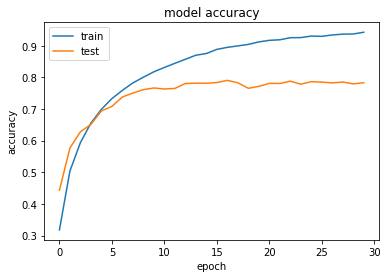

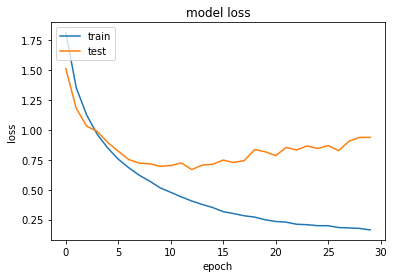

In [12]:
# Sumariza para a precisão
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Sumariza para a mostrar a perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')

plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [13]:

#print("Xtrain[0] ",X_train[0])
#print("Ytrain[0] ",y_train[0])

#print("Xtrain[0] ",X_train[0])
#print("Ytrain[0] ",y_train[0])

# model.save('modelT1')

# print("\nFim")